In [80]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 

# Loading Data

In [81]:
df = pd.read_csv(r"C:\Users\dell\Downloads\Restaurant_revenue .csv")
df.head(10)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
5,92,19.427670,13.114473,American,43.099950,1,10,399.867507
6,96,35.350343,16.960318,American,20.181622,0,86,496.653687
7,84,46.314645,14.486349,Italian,28.921100,1,1,417.158607
8,84,22.647863,15.841873,American,11.732611,0,26,352.148065
9,97,33.532267,8.095969,Italian,37.973579,0,98,272.793517


# Data Pre-Processing 

In [82]:
df.columns

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Cuisine_Type',
       'Average_Customer_Spending', 'Promotions', 'Reviews',
       'Monthly_Revenue'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


Here we can see , we have total 1000 observations. We have 7 features and monthly_revenue as output.
#There are no null values.
#There is only one categorical feature which is "Cuisine_Type".



In [84]:
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

There are no null values here in the dataset

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Customers,1000.0,53.271000,26.364914,10.000000,30.000000,54.000000,74.000000,99.000000
Menu_Price,1000.0,30.219120,11.278760,10.009501,20.396828,30.860614,39.843868,49.974140
Marketing_Spend,1000.0,9.958726,5.845586,0.003768,4.690724,10.092047,14.992436,19.994276
Average_Customer_Spending,1000.0,29.477085,11.471686,10.037177,19.603041,29.251365,39.553220,49.900725
Promotions,1000.0,0.497000,0.500241,0.000000,0.000000,0.000000,1.000000,1.000000
Reviews,1000.0,49.837000,29.226334,0.000000,24.000000,50.000000,76.000000,99.000000
Monthly_Revenue,1000.0,268.724172,103.982950,-28.977809,197.103642,270.213964,343.395793,563.381332


In [86]:
df.describe(include='all')

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Japanese,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,262,NaN,NaN,NaN,NaN
mean,53.271000,30.219120,9.958726,NaN,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,NaN,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,NaN,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,NaN,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,NaN,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,NaN,39.553220,1.000000,76.000000,343.395793


There are lot of insights that can be drawn from the above code:
(Per Month)

There are 4 cuisine types.
Amoung all the cuisine types Japanese cuisine is the most ordered by the customers.
On an average 53 customers arrives in the restaurant with a range of +-(26).
Average customer spending is about 29.47 with a range of +-(11.47).
Average Monthly Revenue is around 268.72 with a range of +-(104).

# EDA

In [87]:
data = df.drop(['Cuisine_Type','Promotions'],axis=1)
data.head(10)

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,36.236133,45,350.912040
1,24,40.020077,4.577892,17.952562,36,221.319091
2,81,41.981485,4.652911,22.600420,91,326.529763
3,70,43.005307,4.416053,18.984098,59,348.190573
4,30,17.456199,3.475052,12.766143,30,185.009121
5,92,19.427670,13.114473,43.099950,10,399.867507
6,96,35.350343,16.960318,20.181622,86,496.653687
7,84,46.314645,14.486349,28.921100,1,417.158607
8,84,22.647863,15.841873,11.732611,26,352.148065
9,97,33.532267,8.095969,37.973579,98,272.793517


# Histogram to check Normality of variables

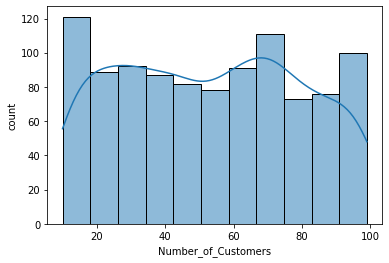

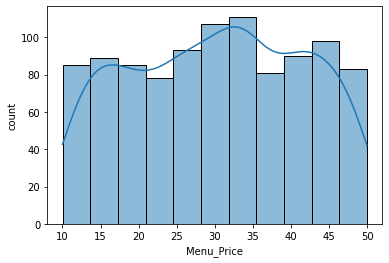

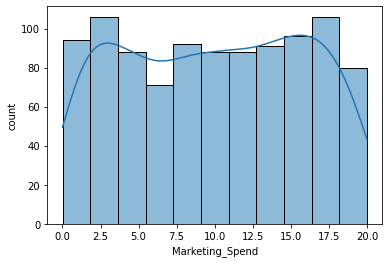

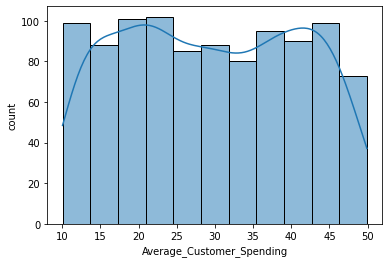

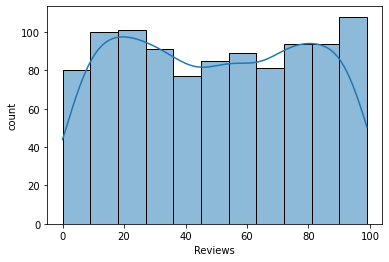

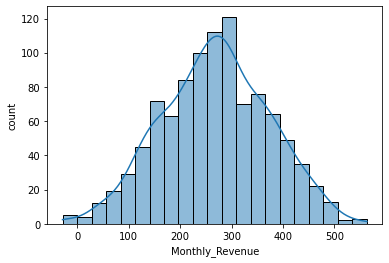

In [88]:
for col in data.columns:
    if data[col].dtype != 'object':
        sns.histplot(data[col], kde=True)  # Add kde=True to enable the kernel density estimation curve
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()


# Checking Normality using QQ plot

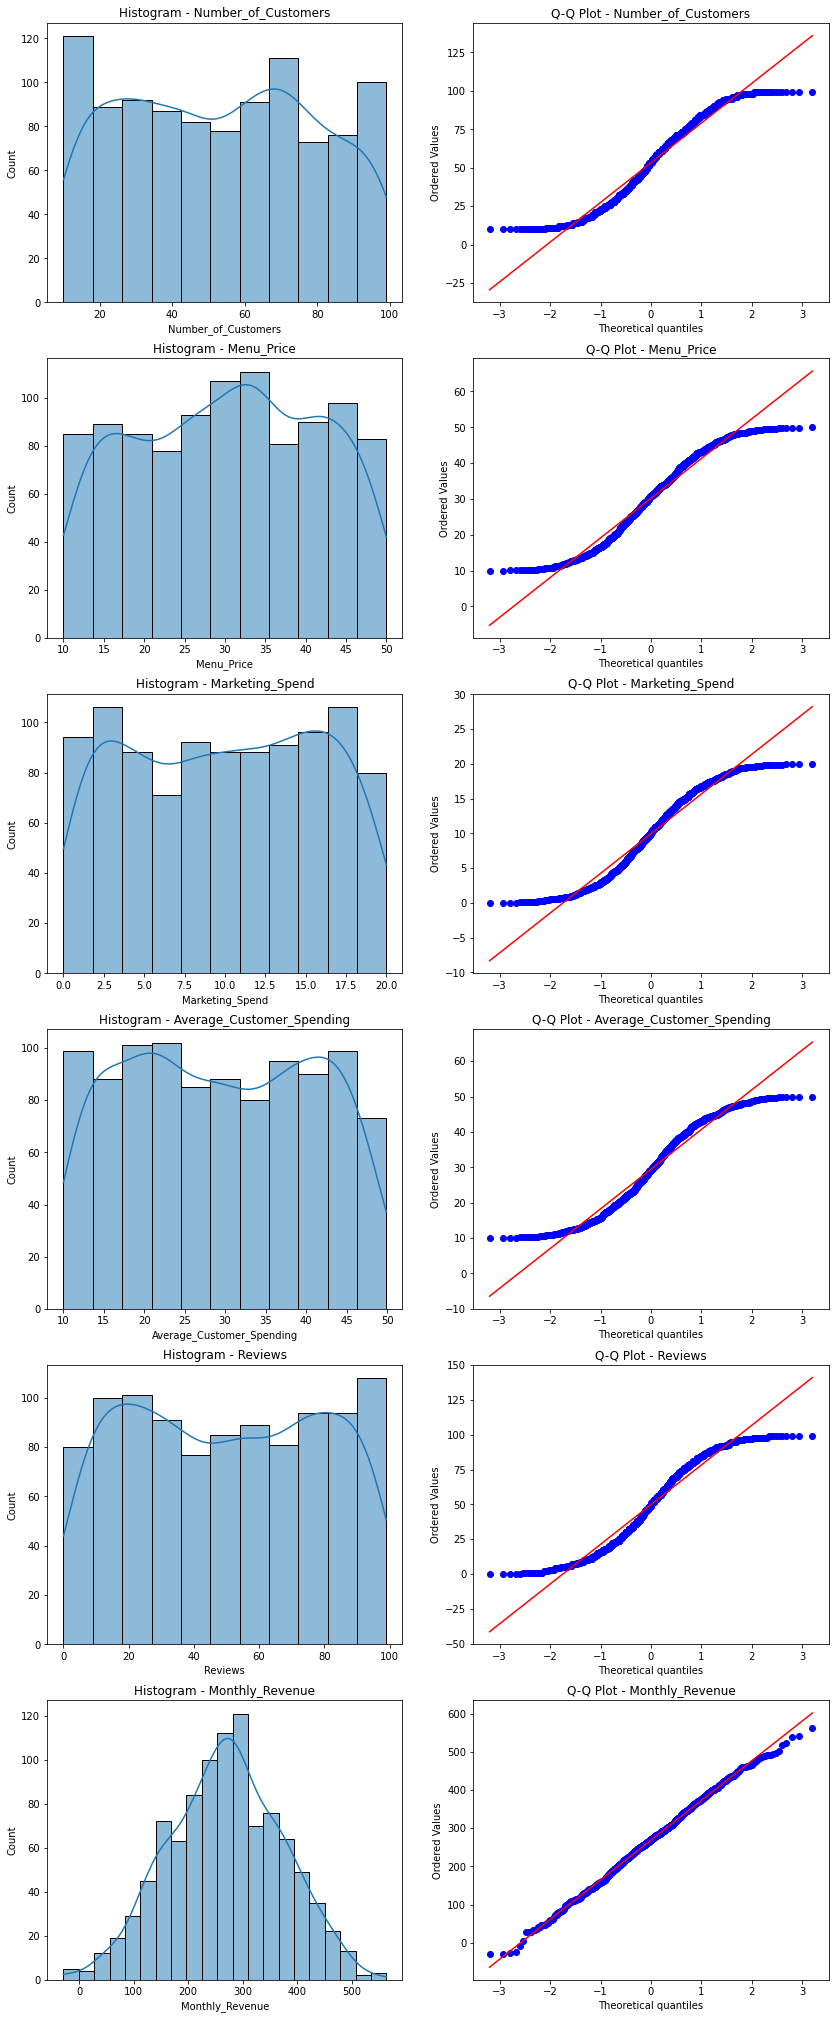

In [89]:
from scipy.stats import norm, probplot

features = data.columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(14, 6 * len(features)))

for i, feature in enumerate(features):
    # Plot histogram
    sns.histplot(df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram - {feature}')

    # Probability plot (Q-Q plot)
    probplot(df[feature], plot=axes[i, 1], dist='norm', fit=True)
    axes[i, 1].set_title(f'Q-Q Plot - {feature}')

plt.show()

# Checking outliers using Box-Plot 

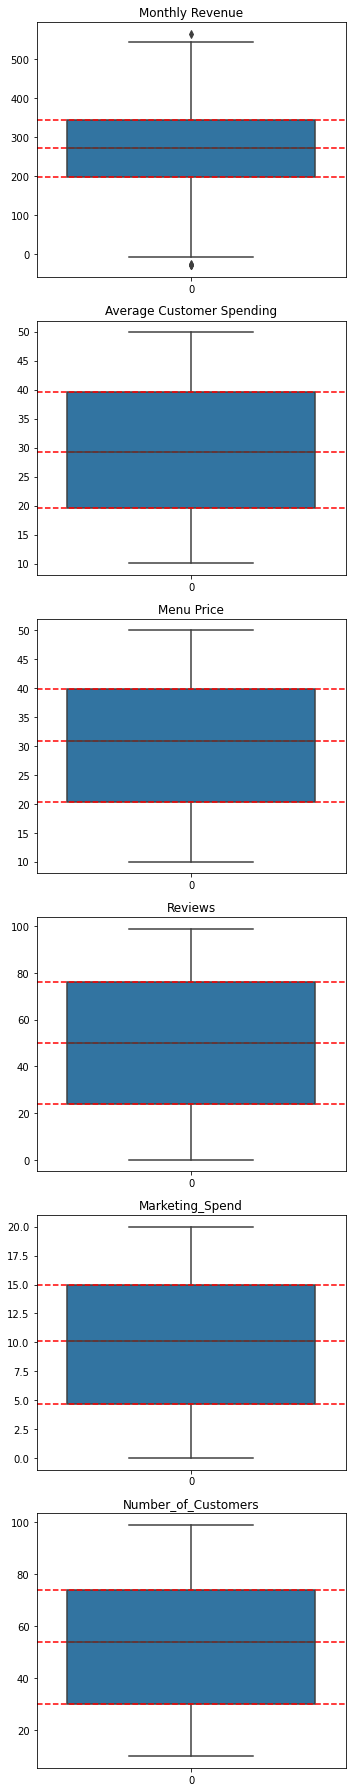

In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define percentiles to display
percentiles = [25, 50, 75]

# Create subplots
fig, axs = plt.subplots(6, figsize=(5, 25))

# Boxplot for Monthly Revenue
plt1 = sns.boxplot(df['Monthly_Revenue'], ax=axs[0])
for p in percentiles:
    percentile_value = np.percentile(df['Monthly_Revenue'], p)
    plt1.axhline(percentile_value, color='r', linestyle='--', label=f'{p}th percentile')
axs[0].set_title('Monthly Revenue')

# Boxplot for Average Customer Spending
plt2 = sns.boxplot(df['Average_Customer_Spending'], ax=axs[1])
for p in percentiles:
    percentile_value = np.percentile(df['Average_Customer_Spending'], p)
    plt2.axhline(percentile_value, color='r', linestyle='--', label=f'{p}th percentile')
axs[1].set_title('Average Customer Spending')

# Boxplot for Menu Price
plt3 = sns.boxplot(df['Menu_Price'], ax=axs[2])
for p in percentiles:
    percentile_value = np.percentile(df['Menu_Price'], p)
    plt3.axhline(percentile_value, color='r', linestyle='--', label=f'{p}th percentile')
axs[2].set_title('Menu Price')

# Boxplot for review
plt4 = sns.boxplot(df['Reviews'], ax=axs[3])
for p in percentiles:
    percentile_value = np.percentile(df['Reviews'], p)
    plt4.axhline(percentile_value, color='r', linestyle='--', label=f'{p}th percentile')
axs[3].set_title('Reviews')

# Boxplot for Marketing_Spend
plt5 = sns.boxplot(df['Marketing_Spend'], ax=axs[4])
for p in percentiles:
    percentile_value = np.percentile(df['Marketing_Spend'], p)
    plt5.axhline(percentile_value, color='r', linestyle='--', label=f'{p}th percentile')
axs[4].set_title('Marketing_Spend')

# Boxplot for Number_Of_Customers
plt6 = sns.boxplot(df['Number_of_Customers'], ax=axs[5])
for p in percentiles:
    percentile_value = np.percentile(df['Number_of_Customers'], p)
    plt6.axhline(percentile_value, color='r', linestyle='--', label=f'{p}th percentile')
axs[5].set_title('Number_of_Customers')


# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# VIF For Multicoliniarity

In [91]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your data is stored in a DataFrame called df
# Select only the independent variables
X = df[['Number_of_Customers', 'Menu_Price', 'Marketing_Spend',
        'Average_Customer_Spending', 'Promotions', 'Reviews']]

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF dataframe
print(vif)

                     Feature        VIF
0                      const  25.256718
1        Number_of_Customers   1.004834
2                 Menu_Price   1.002342
3            Marketing_Spend   1.006431
4  Average_Customer_Spending   1.006927
5                 Promotions   1.006169
6                    Reviews   1.004378


const (Intercept): The VIF value of 25.26 indicates that there is likely multicollinearity between the intercept and the other independent variables. This high VIF value suggests that the constant term is highly correlated with one or more of the other independent variables in the model. This could be due to a scaling issue or some other underlying relationship in the data. It's important to investigate further to understand the source of this multicollinearity.

Number_of_Customers: The VIF value of 1.00 indicates low multicollinearity for the 'Number_of_Customers' variable. This suggests that the variance of the estimated regression coefficient for 'Number_of_Customers' is not significantly inflated due to collinearity with other independent variables.

Menu_Price, Marketing_Spend, Average_Customer_Spending, Promotions, Reviews: Similarly, all other independent variables have VIF values close to 1, indicating low multicollinearity. This suggests that the variance of the estimated regression coefficients for these variables is not significantly inflated due to collinearity with other independent variables.

# Correlation between variables

In [92]:
data.corr()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Reviews,Monthly_Revenue
Number_of_Customers,1.000000,0.033470,-0.007024,-0.013898,-0.010140,0.745239
Menu_Price,0.033470,1.000000,0.016319,0.020808,0.003792,0.259579
Marketing_Spend,-0.007024,0.016319,1.000000,-0.058586,-0.031470,0.269929
Average_Customer_Spending,-0.013898,0.020808,-0.058586,1.000000,0.054163,-0.035665
Reviews,-0.010140,0.003792,-0.031470,0.054163,1.000000,-0.024946
Monthly_Revenue,0.745239,0.259579,0.269929,-0.035665,-0.024946,1.000000


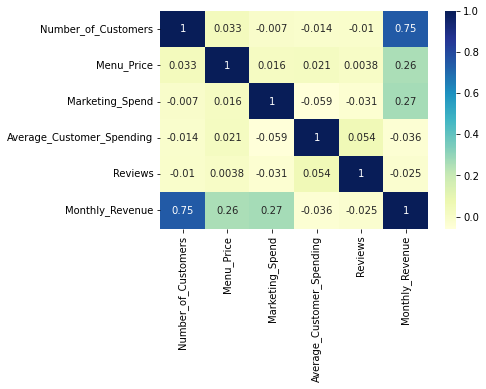

In [93]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Pie-Chart for different cuisine types

In [94]:
data1 = df.groupby(['Cuisine_Type'])['Monthly_Revenue'].sum().reset_index()
data1.head(10)

,Cuisine_Type,Monthly_Revenue
0,American,69018.835189
1,Italian,61178.367971
2,Japanese,71185.448715
3,Mexican,67341.520423


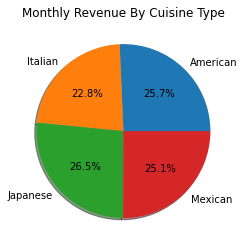

In [95]:
labels = data1['Cuisine_Type'] 
values = data1['Monthly_Revenue']

plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True)
plt.title('Monthly Revenue By Cuisine Type')
plt.show()

# Label Encoding
Using Label Encoding on "Cuisine_Type" to convert each unique category into an integer.

In [96]:
cuisine_mapping = {'American': 1, 'Italian': 2, 'Japanese': 3, 'Mexican': 4}

# Replace cuisine names with numeric values
df['cuisine'] = df['Cuisine_Type'].replace(cuisine_mapping)

df=df.drop(['Cuisine_Type'], axis=1)

In [97]:
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,cuisine
0,61,43.117635,12.663793,36.236133,0,45,350.912040,3
1,24,40.020077,4.577892,17.952562,0,36,221.319091,2
2,81,41.981485,4.652911,22.600420,1,91,326.529763,3
3,70,43.005307,4.416053,18.984098,1,59,348.190573,2
4,30,17.456199,3.475052,12.766143,1,30,185.009121,2
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40,249.312034,3
996,31,20.615496,5.822885,17.040990,0,57,110.228767,4
997,69,17.110656,4.141898,44.649315,0,55,312.212552,3
998,73,37.664722,3.046556,27.767358,0,23,272.482204,3


# Modeling

In [98]:
X = df.drop(['Monthly_Revenue'],axis=1)
y = df.Monthly_Revenue

In [99]:
X

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,cuisine
0,61,43.117635,12.663793,36.236133,0,45,3
1,24,40.020077,4.577892,17.952562,0,36,2
2,81,41.981485,4.652911,22.600420,1,91,3
3,70,43.005307,4.416053,18.984098,1,59,2
4,30,17.456199,3.475052,12.766143,1,30,2
...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40,3
996,31,20.615496,5.822885,17.040990,0,57,4
997,69,17.110656,4.141898,44.649315,0,55,3
998,73,37.664722,3.046556,27.767358,0,23,3


In [100]:
y

0      350.912040
1      221.319091
2      326.529763
3      348.190573
4      185.009121
          ...    
995    249.312034
996    110.228767
997    312.212552
998    272.482204
999    379.973072
Name: Monthly_Revenue, Length: 1000, dtype: float64

# Standard Scaling

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [102]:
X_scaled

array([[ 0.29330145,  1.14418338,  0.46298522, ..., -0.99401789,
        -0.16558424,  0.43974759],
       [-1.11078105,  0.86940951, -0.92095572, ..., -0.99401789,
        -0.47367979, -0.45042972],
       [ 1.05226497,  1.04339936, -0.90811591, ...,  1.00601811,
         1.40912633,  0.43974759],
       ...,
       [ 0.59688686, -1.16280727, -0.99557815, ..., -0.99401789,
         0.17674414,  0.43974759],
       [ 0.74867956,  0.66047401, -1.18305134, ..., -0.99401789,
        -0.91870668,  0.43974759],
       [ 1.05226497,  0.39944108,  1.37443806, ...,  1.00601811,
         0.7587024 , -0.45042972]])

# Train - Test Split

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=12)

# Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [105]:
y_pred = lr.predict(x_test)
y_pred

array([208.61406427, 265.70616788, 261.09566525, 157.50167778,
       132.03012586, 208.72208681, 272.47447044, 356.14950943,
       368.47517935, 230.38733589, 326.92867781, 219.11500371,
       474.56561991, 379.49903674, 312.54822312, 231.19841221,
       138.95304228, 241.69066326, 132.19187915, 321.03664721,
        74.69180016, 307.13509919, 168.5054837 , 231.18201185,
       354.54198012, 293.73538842, 357.67083707, 298.0864227 ,
       285.38607985, 291.35650266, 333.48341905, 258.52417459,
       253.46234928, 271.68692632, 340.52679326, 198.48193343,
       190.90593266, 185.13845082, 295.44476355, 319.40114607,
       177.23027279, 138.33394179, 209.62873264, 166.72875539,
       393.1397723 , 272.25363898, 335.16579756, 329.18627958,
       205.13534234, 309.22963963, 370.08815682, 157.10448612,
       246.55371192, 196.7118043 , 338.17034143, 165.30100138,
       324.15542943, 377.05743072, 203.38094881, 292.8350167 ,
       374.77135196, 270.41827013, 169.61844352, 218.98

In [106]:
y_pred_train_lr = lr.predict(x_train)

In [107]:
from sklearn.metrics import *
r2_score_lr_test = r2_score(y_test,y_pred)
r2_score_lr_train = r2_score(y_train,y_pred_train_lr)

The Train r2 score is: 0.6898549170697346
The RMSE score for Train data is: 58.993121769449175


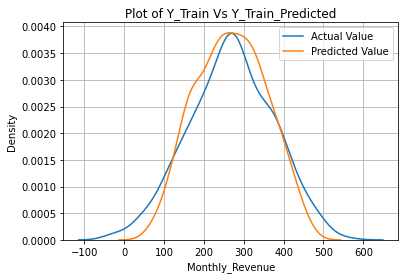

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.6686232170766755
The RMSE score for Test data is: 57.03354584991667


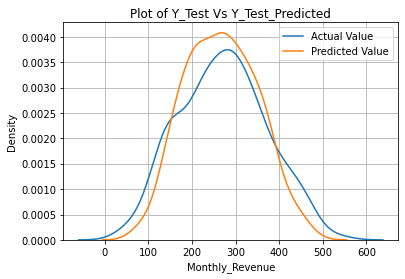

In [108]:
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train_lr)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train_lr,squared=False)}")  
sns.kdeplot(y_train, label='Actual Value')
sns.kdeplot(y_pred_train_lr, label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.legend()
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred,squared=False)}")
sns.kdeplot(y_test, label='Actual Value')
sns.kdeplot(y_pred, label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.legend()
plt.show()

In [140]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression()
lr.fit(x_train, y_train)

scorer = make_scorer(r2_score)

num_folds = [6, 7, 8, 9, 10]
best_accuracy = float('-inf')
best_fold = None

for folds in num_folds:
    cross_val_scores = cross_val_score(lr, x_train, y_train, cv=folds, scoring=scorer)
    average_r2_score = np.mean(cross_val_scores)

    if average_r2_score > best_accuracy:
        best_accuracy = average_r2_score
        best_fold = folds
        print(f"Number of Folds: {folds}")
        print("Cross-Validation R2 Scores:", cross_val_scores)
        print("Average Cross-Validation R2 Score:", average_r2_score)

        lr.fit(x_train, y_train)

        lr_pred = lr.predict(x_test)
        lr_test_r2 = r2_score(y_test, lr_pred)
        print("R2 Score on Test Set:", lr_test_r2)
        print("\n")


Number of Folds: 6
Cross-Validation R2 Scores: [0.69090922 0.6424025  0.67084856 0.65363932 0.69646322 0.69093081]
Average Cross-Validation R2 Score: 0.6741989394598829
R2 Score on Test Set: 0.6686232170766755


Number of Folds: 9
Cross-Validation R2 Scores: [0.69362541 0.65009041 0.65058856 0.68831327 0.67230932 0.63123073
 0.70315972 0.6656275  0.71428533]
Average Cross-Validation R2 Score: 0.6743589178607794
R2 Score on Test Set: 0.6686232170766755




This output provides the results of cross-validation for evaluating the performance of a regression model, as well as the R-squared (R2) score on the test set. Let's break down each part:

Number of Folds:

This indicates the number of folds used in k-fold cross-validation. In the first example, 6 folds were used, while in the second example, 9 folds were used. Cross-Validation R2 Scores:

These are the R2 scores obtained from each fold during cross-validation. Each value represents the R2 score of the model on a different validation set. For example, in the first case with 6 folds, we have R2 scores of approximately 0.69, 0.64, 0.67, 0.65, 0.70, and 0.69 for each fold. Average Cross-Validation R2 Score:

This is the average of the R2 scores obtained from all folds during cross-validation. It provides an overall assessment of the model's performance across different validation sets. For example, in the first case with 6 folds, the average R2 score is approximately 0.67. R2 Score on Test Set:

This is the R2 score obtained when the model is evaluated on the test set that was not used during training or cross-validation. It indicates how well the model generalizes to new, unseen data. In both examples, the R2 score on the test set is approximately 0.67. Overall, cross-validation helps assess the stability and generalization performance of the model by evaluating it on multiple validation sets. The average cross-validation R2 score provides an estimate of the model's performance, while the R2 score on the test set confirms its generalization ability to unseen data. In this case, both cross-validation and test set evaluation suggest that the model performs reasonably well, with R2 scores around 0.67

In [112]:
# Get the coefficients (weights) and intercept
coefficients = lr.coef_
intercept = lr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [76.34515912 25.64311442 29.19863452  0.62841342 -2.44090143 -1.92998316
  2.91324644]
Intercept: 267.6444522155798


In [113]:
# Calculate residuals of linear regression
residuals_lr = y_test - y_pred

In [114]:
residuals_lr 

518      9.280517
871    -12.693253
797     41.895238
274     23.870347
325     78.777593
          ...    
622     67.266399
251    -45.415868
222     -6.635482
362      8.418307
674    114.381623
Name: Monthly_Revenue, Length: 300, dtype: float64

# Histogram of residuals

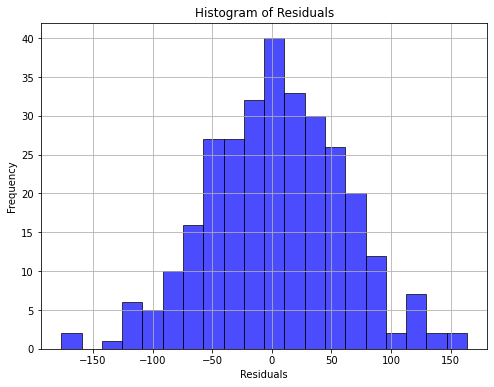

In [115]:
import matplotlib.pyplot as plt

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals_lr, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# To check Homoscadasticity or Heteroscadasticity

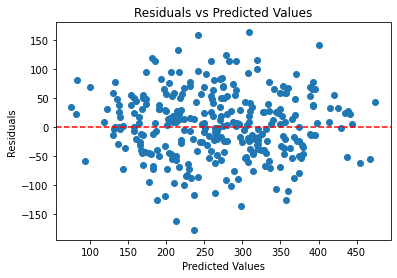

In [116]:
# Plot residuals against predicted values
plt.scatter(y_pred, residuals_lr)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

To interpret the graph of homoscedasticity:

1. *Vertical Spread*: Look at the vertical spread of the points around the horizontal line at 0 (the red dashed line). If the points are scattered randomly above and below the 0 line and there's no clear pattern, it suggests that the variability of the residuals is relatively constant across the range of predicted values. This indicates homoscedasticity.

2. *Horizontal Linearity*: Examine whether there is a consistent spread of points along the horizontal axis (the predicted values). If the spread of points remains relatively constant as the predicted values increase, it supports the assumption of homoscedasticity.

# BPM TEST for Heteroscadasticity

In [117]:
from statsmodels.stats.diagnostic import het_breuschpagan

import statsmodels.api as sm

# Assuming y_test is your feature matrix without a constant column
# Add a constant column to y_test
y_test_with_const = sm.add_constant(y_test)

# Now you can use X_test_with_const in the het_breuschpagan function
lm_statistic, lm_p_value, f_statistic, f_p_value = het_breuschpagan(residuals_lr, y_test_with_const)

#Print the results
print("Breusch-Pagan Test Results:")
print("LM Statistic:", lm_statistic)
print("LM P-value:", lm_p_value)
print("F Statistic:", f_statistic)
print("F P-value:", f_p_value)

Breusch-Pagan Test Results:
LM Statistic: 0.004938335900739332
LM P-value: 0.9439761379555189
F Statistic: 0.004905494411344654
F P-value: 0.9442094080494323


LM Statistic: This is the Lagrange Multiplier (LM) test statistic. It measures the overall significance of the heteroscedasticity in the residuals. In this case, the LM statistic is very low (0.00494), indicating that there is little evidence to reject the null hypothesis of homoscedasticity.

LM P-value: This is the p-value associated with the LM statistic. It indicates the probability of observing the LM statistic if the null hypothesis of homoscedasticity is true. A high p-value (close to 1) suggests weak evidence against the null hypothesis. In this case, the p-value is approximately 0.944, which is much higher than the significance level (e.g., 0.05). Therefore, we fail to reject the null hypothesis, indicating homoscedasticity.

F Statistic: This is an alternative test statistic for the Breusch-Pagan test. It also measures the significance of heteroscedasticity. Like the LM statistic, a low F statistic suggests little evidence against the null hypothesis of homoscedasticity.

F P-value: This is the p-value associated with the F statistic. It provides a similar interpretation as the LM p-value. A high F p-value indicates weak evidence against the null hypothesis of homoscedasticity.

Overall, based on these results, we conclude that there is no significant evidence of heteroscedasticity in the residuals, and the assumption of homoscedasticity is likely met.

​

# Test for Normality of residuals

In [118]:
from scipy.stats import shapiro

# Assuming you have residuals_lasso from previous steps

# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(residuals_lr)
print("Shapiro-Wilk Test - Statistic:", statistic, "p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value > alpha:
    print("Residuals are likely normally distributed (fail to reject H0)")
else:
    print("Residuals are not normally distributed (reject H0)")


Shapiro-Wilk Test - Statistic: 0.998315155506134 p-value: 0.9919145703315735
Residuals are likely normally distributed (fail to reject H0)


Statistic (W) = 0.9983: The test statistic is close to 1, indicating good agreement between the observed residuals and what would be expected under a normal distribution.

p-value = 0.9919: The p-value is quite high, approximately 0.9919. This indicates that there is a high probability of observing the test statistic or a more extreme value if the null hypothesis (residuals are normally distributed) is true.

Therefore, with such a high p-value, we fail to reject the null hypothesis. In other words, there is insufficient evidence to conclude that the residuals are not normally distributed. Consequently, we can reasonably assume that the residuals follow a normal distribution, which is an essential assumption for many statistical methods and hypothesis tests.

# Test for independence of residuals 

In [119]:
from statsmodels.stats.stattools import durbin_watson

# Assuming residuals is the array of residuals from your model

# Perform Durbin-Watson test
dw_statistic = durbin_watson(residuals_lr)
print("Durbin-Watson statistic:", dw_statistic)


Durbin-Watson statistic: 2.112136509588764


Durbin-Watson statistic: 2.112
This value is close to 2, which suggests that there is likely no significant autocorrelation present in the residuals. However, the interpretation should consider the context of the specific dataset and the assumptions of the regression model being used.








# Decision Tree Regressor

In [120]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [121]:
y_pred_test_dt = dt.predict(x_test)
y_pred_test_dt


array([197.32753689, 284.74783211, 251.3293657 , 216.45659725,
       151.67789277, 304.47614299, 304.30439181, 442.85495849,
       242.10514526, 144.76776259, 367.1711011 , 336.29082848,
       496.65368673, 424.04176039, 296.05989693, 140.19167242,
        57.31941977, 230.31295836, 110.22876748, 268.70955919,
       101.80258567, 366.17796928, 275.00921026, 101.73977936,
       365.47491156, 246.74985639, 388.72527963, 367.5586697 ,
       300.9057773 , 372.04628256, 355.54291492, 345.2649163 ,
       265.85078297, 251.84569806, 338.41565675, 275.00921026,
       201.42298321, 231.04123356, 203.37598814, 229.26251142,
       178.12400695, 211.38944801, 167.10266491, 251.38772616,
       385.04882726, 251.84569806, 359.89874895, 297.53247518,
       237.57590435, 292.97732669, 417.15860671, 227.6197437 ,
       340.70900416, 195.39174263, 462.10452937, 211.38944801,
       367.80918361, 437.07839083, 201.42298321, 300.9057773 ,
       484.9508482 , 229.95311985, 239.54694933, 275.21

In [122]:
y_pred_train_dt = dt.predict(x_train)


In [123]:
r2_score_dt_test = r2_score(y_test,y_pred_test_dt)
r2_score_dt_train = r2_score(y_train,y_pred_train_dt)


The Train r2 score is: 1.0
The RMSE score for Train data is: 0.0


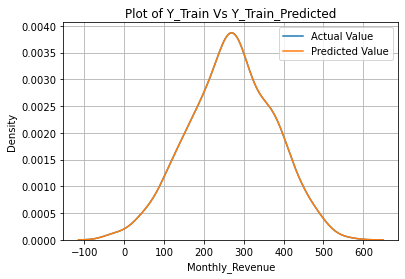

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.2899328173240512
The RMSE score for Test data is: 83.4870383478977


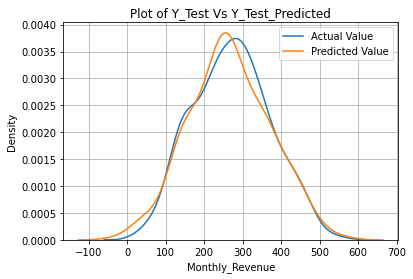

In [124]:
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train_dt)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train_dt,squared=False)}")  
sns.kdeplot(y_train, label='Actual Value')
sns.kdeplot(y_pred_train_dt,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.legend()
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred_test_dt)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred_test_dt,squared=False)}")
sns.kdeplot(y_test,label='Actual Value')
sns.kdeplot(y_pred_test_dt,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.legend()
plt.show()

# Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)


RandomForestRegressor()

In [126]:
y_pred_test_rfr = rfr.predict(x_test)
y_pred_train_rfr = rfr.predict(x_train)
y_pred_test_rfr

array([225.45229114, 278.02340567, 272.9039408 , 160.24832114,
       122.10287055, 204.19608006, 287.69401207, 376.22690601,
       376.65571555, 197.30634829, 334.54184272, 248.35345148,
       452.00868371, 362.13435915, 313.67521792, 212.9695452 ,
       141.7519286 , 249.22704822, 156.97828842, 305.6625873 ,
       107.0682091 , 331.2309325 , 207.72227916, 194.49014996,
       334.57768174, 281.82179471, 354.41081278, 341.54454051,
       279.05595717, 315.93740807, 317.24832455, 276.49072727,
       246.60121163, 266.04471888, 332.3016377 , 231.27085498,
       202.61024461, 159.13498498, 268.11676188, 309.80866397,
       161.43008854, 124.72908725, 205.45931727, 182.82645088,
       397.64537616, 267.70416914, 332.20525616, 350.85965419,
       215.02414583, 299.11663915, 389.26086373, 182.31529023,
       229.17306323, 194.14798866, 341.07696725, 160.1720205 ,
       317.56504181, 396.75204108, 230.49569587, 254.46743369,
       395.71946559, 280.01312302, 201.66871801, 241.58

In [127]:
r2_score_rfr_test = r2_score(y_test,y_pred_test_rfr)
r2_score_rfr_train = r2_score(y_train,y_pred_train_rfr)

The Train r2 score is: 0.9499940972299701
The RMSE score for Train data is: 23.688063823547573


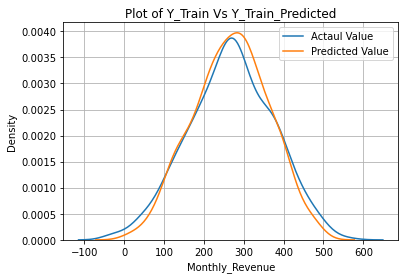

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.6410978354512024
The RMSE score for Test data is: 59.35500872589988


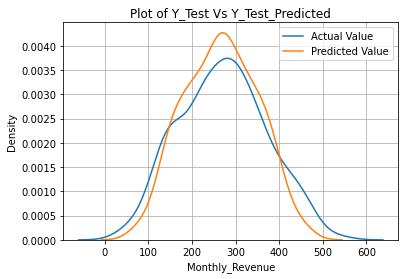

In [128]:
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train_rfr)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train_rfr,squared=False)}")  
sns.kdeplot(y_train,label='Actaul Value')
sns.kdeplot(y_pred_train_rfr,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.legend()
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred_test_rfr)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred_test_rfr,squared=False)}")
sns.kdeplot(y_test,label='Actual Value')
sns.kdeplot(y_pred_test_rfr,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.legend()
plt.show()

# KNN Regressor

In [129]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [130]:
y_pred_test_knn = knn.predict(x_test)
y_pred_train_knn = knn.predict(x_train)
r2_score_test_knn = r2_score(y_test,y_pred_test_knn)
r2_score_train_knn = r2_score(y_train,y_pred_train_knn)


The Train r2 score is: 0.6805050666682485
The RMSE score for Train data is: 59.875743069092984


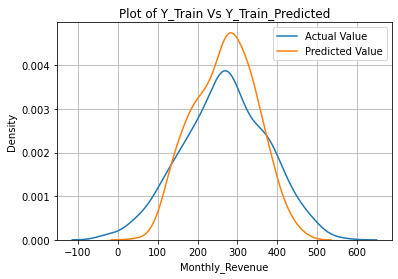

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.5596900345449687
The RMSE score for Test data is: 65.74285979160994


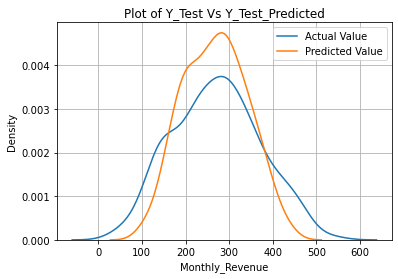

In [131]:
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train_knn)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train_knn,squared=False)}")  
sns.kdeplot(y_train,label='Actual Value')
sns.kdeplot(y_pred_train_knn,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.legend()
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred_test_knn)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred_test_knn,squared=False)}")
sns.kdeplot(y_test,label='Actual Value')
sns.kdeplot(y_pred_test_knn,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.legend()
plt.show()

# Gradient Boosting 

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_test_gbr = gbr.predict(x_test)
y_pred_train_gbr = gbr.predict(x_train)

In [133]:
r2_score_test_gbr = r2_score(y_test,y_pred_test_gbr)
r2_score_train_gbr = r2_score(y_train,y_pred_train_gbr)


The Train r2 score is: 0.8248130818424836
The RMSE score for Train data is: 44.33735332905922


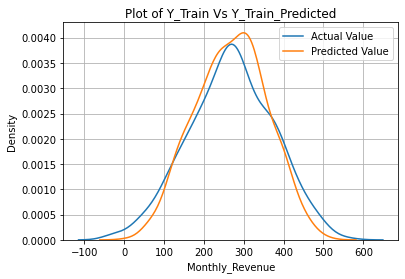

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.6374340543415264
The RMSE score for Test data is: 59.65719635819899


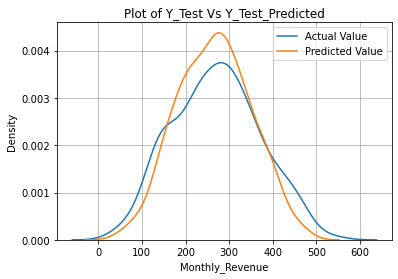

In [134]:
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train_gbr)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train_gbr,squared=False)}")  
sns.kdeplot(y_train,label="Actual Value")
sns.kdeplot(y_pred_train_gbr,label="Predicted Value")
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.legend()
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred_test_gbr)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred_test_gbr,squared=False)}")
sns.kdeplot(y_test,label='Actual Value')
sns.kdeplot(y_pred_test_gbr,label='Predicted Value')
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.legend()
plt.show()


# Comparision of models

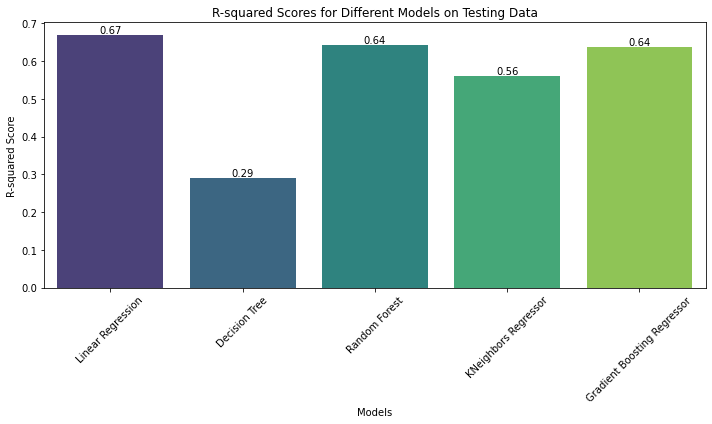

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Values for R-squared scores
r2_scores = [r2_score_lr_test, r2_score_dt_test, r2_score_rfr_test, r2_score_test_knn, r2_score_test_gbr]

# Models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNeighbors Regressor', 'Gradient Boosting Regressor']

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores, palette='viridis')

# Annotate each bar with its corresponding R-squared score
for i, r2 in enumerate(r2_scores):
    plt.text(i, r2, f'{r2:.2f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores for Different Models on Testing Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


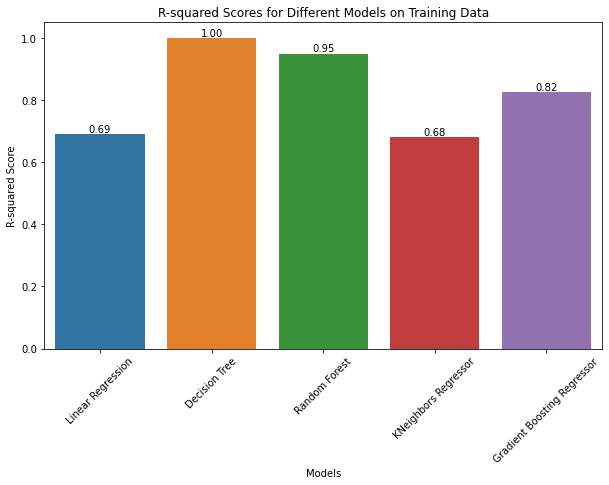

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# R-squared scores for different models on training data
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNeighbors Regressor', 'Gradient Boosting Regressor']
r2_scores_train = [r2_score_lr_train, r2_score_dt_train, r2_score_rfr_train, r2_score_train_knn, r2_score_train_gbr]

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores_train)

# Annotate each bar with its corresponding R-squared score
for i, r2_score in enumerate(r2_scores_train):
    plt.text(i, r2_score, f'{r2_score:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores for Different Models on Training Data')
plt.xticks(rotation=45)

# Show plot
plt.show()
